# Vertrauensintervall - einseitig (nach oben)

Die Ausgangslage ist ähnlich wie beim zweiseitigen Vertrauensintervall 

Wir gehen von einer Normalverteilungskurve $X\sim\mathcal{N}(5,2^2)$ aus. Dann ist das $q_{0.95}$-Quantil: 

In [81]:
import scipy.stats as st
st.norm.ppf(q=0.95, loc=5 , scale=2)

8.289707253902945

Unten ist die Normalverteilungskurve mit dem Verwerfungsbereich rot eingezeichnet.

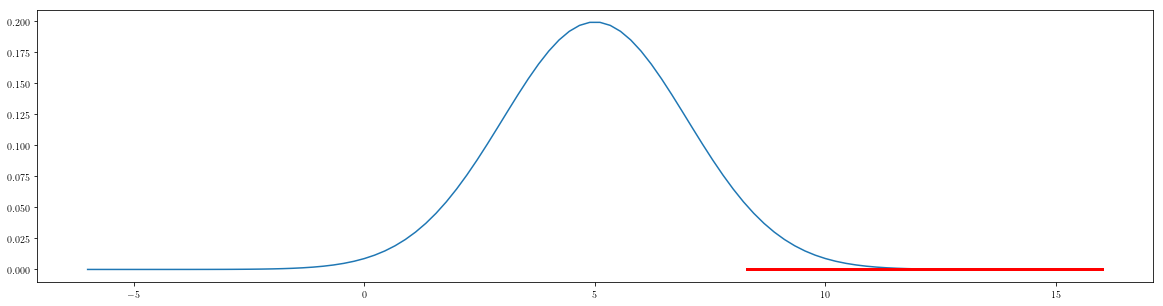

In [83]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams["figure.figsize"] = (20,5)

# Bereich der x-Achse
aw = -6
ew = 16

# Berechnung der Funktionswerte
mean = 5
sd = 2
x = np.linspace(start=aw, stop=ew, num=100)
y = norm.pdf(x, loc=mean, scale=sd)

plt.plot(x,y)

#Bestimmung der Quantile
q_95 = norm.ppf(q=0.95, loc=mean , scale=sd)

# Plot des Verwerfungsbereiches

plt.plot([q_95, ew], [0, 0], color="red", linewidth=3)

Liegt nun $\overline{x}_n$ im Verwerfungsbereich (roter Bereich), dann wird die Nullhypothese $H_0$ verworfen. 


Nun ist das wahre $\mu$ praktisch immer unbekannt und für die Bestimmung der Verwerfungsbereiches wurde ein Wert einfach angenommen. Wir können die Frage auch einfach umkehren: Wir kennen $\overline{x}_n$ und fragen uns, für welche $\mu$ wird $H_0$ _nicht_ verworfen.

Dies kann man rechnerisch herleiten, wir machen es hier aber graphisch. Wir gehen zur Veranschaulichung wieder von der Annahme $\mu=5$ aus.

Wir haben nun $\overline{x}_n=6$ gegeben und zeichnen den Verwerfungsbereich ein. In der Skizze unten sind:

- Die dicken roten Linien entsprechen dem Verwerfungsbereich für $\mu=\overline{x}_n=6$. 
- Die dünnen roten Linien entsprechen dem Verwerfungsbereich für $\mu_0=5$.
- Der vertikale schwarze Strich entspricht dem $\mu=\overline{x}_n=6$
- Der vertikale blaue Strich entspricht dem $\mu_0=5$

Beim einseitigen Test für $H_0$ nach oben, betrachten wir den Verwerfungsbereich für $\overline{x}_n$ nach unten. Warum ist dies so? Wenn $H_0$ dortdrin liegt, dann ist $\overline{x}_n$ zu gross und $H_0$ wird verworfen.  

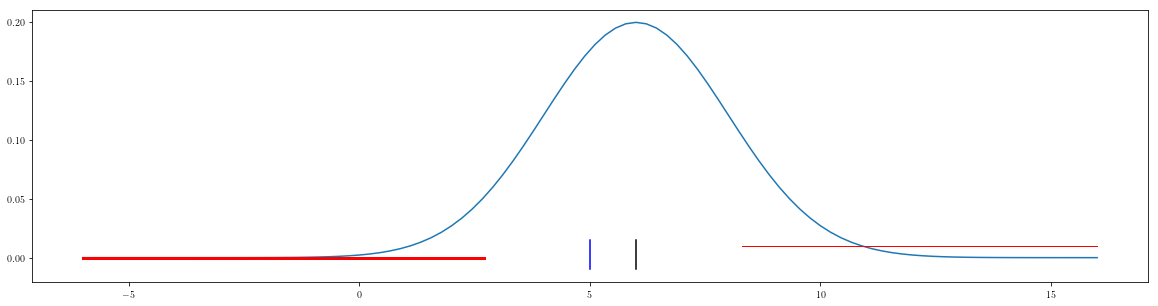

In [85]:
# Berechnung der Funktionswerte
mean = 6

x = np.linspace(start=aw, stop=ew, num=100)
y = norm.pdf(x, loc=mean, scale=sd)

plt.plot(x,y)

#Bestimmung der Quantile
q_05 = norm.ppf(q=0.05, loc=mean , scale=sd)

# Plot des Verwerfungsbereiches
plt.plot([aw, q_05], [0, 0], color="red", linewidth=3)
#plt.plot([q_95, ew], [0, 0], color="green", linewidth=3)

plt.plot([mean, mean], [-.01, .015], color="black")
plt.plot([5, 5], [-.01, .015], color="blue")

# Plot des Verwerfungsbereiches
q_95_n = norm.ppf(q=0.95, loc=5 , scale=2)
plt.plot([q_95_n, ew], [0.01, 0.01], color="red", linewidth=1)

Wir stellen fest, dass beide Werte $\mu$ und $\mu_0$ nicht innerhalb in einem der beiden Verwerfungsbereiche liegen. Die Idee ist nun, dass wir $\mu$ vergrössern und $\mu_0=5$ konstant lassen. Dazu definieren wir folgende Funktion vb(), wo jeweils $\mu$ übergeben wird:

In [86]:
def vb(mean):
    x = np.linspace(start=aw, stop=ew, num=100)
    y = norm.pdf(x, loc=mean, scale=sd)
    plt.plot(x,y)
    #Bestimmung der Quantile
    #Bestimmung der Quantile
    q_05 = norm.ppf(q=0.05, loc=mean , scale=sd)

    # Plot des Verwerfungsbereiches
    plt.plot([aw, q_05], [0, 0], color="red", linewidth=3)
    
    plt.plot([mean, mean], [-.01, .015], color="black")
    plt.plot([5, 5], [-.01, .015], color="blue")
    # Plot des Verwerfungsbereiches
    q_95_n = norm.ppf(q=0.95, loc=5 , scale=2)
    plt.plot([q_95_n, ew], [0.01, 0.01], color="red", linewidth=1)
    

Wir wählen nun $\mu=7$, dann $\mu=8$ und $\mu=9.5$.

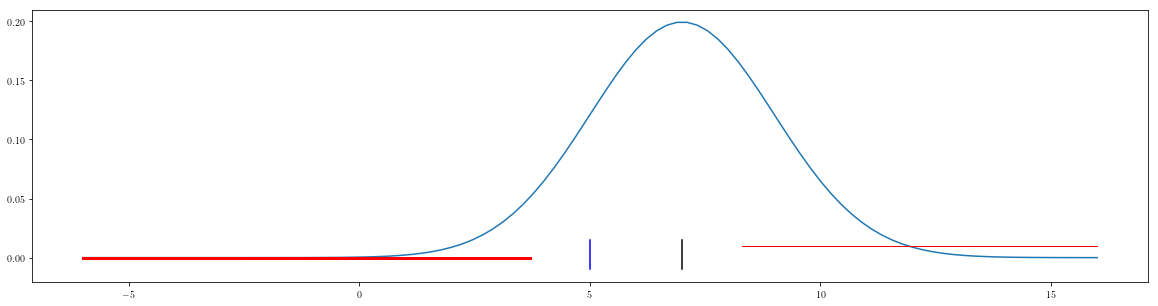

In [88]:
vb(7)

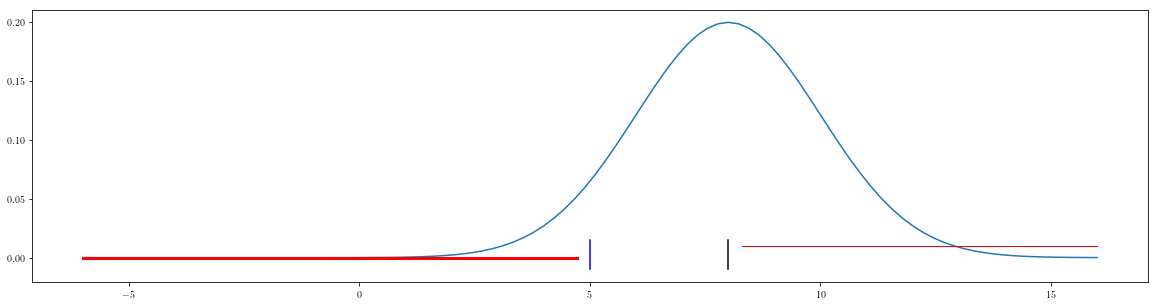

In [89]:
vb(8)

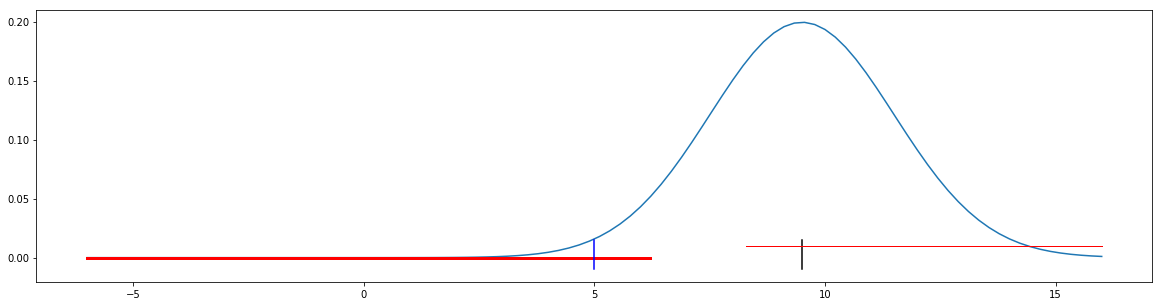

In [43]:
vb(9.5)

Für $\mu=7$ und $\mu=8$ ist die Situation ähnlich wie bei $\mu=7$, dass beide Werte $\mu$ und $\mu_0$ nicht innerhalb in einem der beiden Verwerfungsbereiche liegen, also $H_0$ für $\mu_0=5$ _nicht_ verworfen wird.

Die Situation ändert sich für $\mu=9.5$, da liegt dieser Wert (schwarze Linie) im Verwerfungsbereich von $\mu_0=5$ (dünne rote Linien), also wird die Nullhypothese $H_0$ nun verworfen. Auf der anderen Seite liegt nun aber $\mu_0=5$ im Verwerfungsbereich für $\mu=9.5$. 

Wir wollen dies noch anders darstellen. Wir nehmen nicht der Verwerfungsbereich, sondern das was _nicht_ zum Verwerfungsbereich gehört. Der ist unten grün eingezeichnet. 

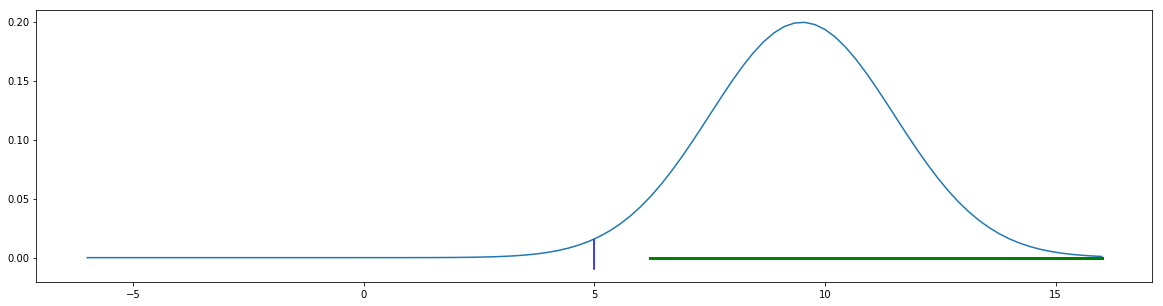

In [42]:
# Berechnung der Funktionswerte
mean = 9.5

x = np.linspace(start=aw, stop=ew, num=100)
y = norm.pdf(x, loc=mean, scale=sd)

plt.plot(x,y)

#Bestimmung der Quantile
q_05 = norm.ppf(q=0.05, loc=mean , scale=sd)

# Plot der Vertrauensintervall 
plt.plot([q_05, ew], [0, 0], color="green", linewidth=3)

plt.plot([5, 5], [-.01, .015], color="blue")

Der Wert 5 liegt nicht im Vertrauensintervall:

In [90]:
print("Vertrauensintervall", q_05,u"\u221E")

Vertrauensintervall 2.7102927460970543 ∞


Wir haben oben gesehen, dass die Nullhypothese dann verworfen wird. Fällt das wahre $\mu$ also aus dem Vertrauensintervall, dann wird die Nullhypothese verworfen. 

Dies führt uns zu einer weiteren Interpretation des Vertrauensintervalls. Dieses enthält alle $\mu$'s für die Nullhypothese _nicht_ verworfen wird. Es sagt uns also in welchem Intervall sich das wahre $\mu$ befindet. Und wie immer gilt dies nicht absolut, sondern mit einer bestimmten Wahrscheinlichkeit. In diesen Fall liegt das wahre $\mu$ zu 95% im Vertrauensintervall. Wir sprechen deswegen auch von einem 95%-Vertrauensintervall. 

Somit haben wir einen weitere Möglichkeit für einen Testentscheid:
- Liegt $\mu_0$ der Nullhypothese im Vertrauensintervall, so wird die Nullhypothese _nicht_ verworfen. 
- Liegt $\mu_0$ der Nullhypothese _nicht_ im Vertrauensintervall, so wird die Nullhypothese  verworfen.

Hier noch die Funktion vi():

In [79]:
def vi(mean):
    # Berechnung der Funktionswerte
    x = np.linspace(start=aw, stop=ew, num=100)
    y = norm.pdf(x, loc=mean, scale=sd)

    plt.plot(x,y)

    #Bestimmung der Quantile
    q_05 = norm.ppf(q=0.05, loc=mean , scale=sd)
    print("Vertrauensintervall", q_05,u"\u221E")
    
    # Plot der Vertrauensintervall 
    plt.plot([q_05, ew], [0, 0], color="green", linewidth=3)

    plt.plot([5, 5], [-.01, .015], color="blue")

Vertrauensintervall 1.7102927460970543 ∞


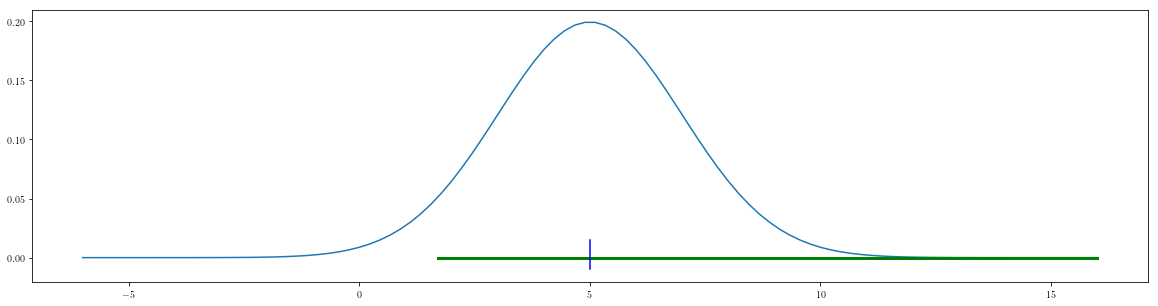

In [80]:
vi(5)

Vertrauensintervall 4.710292746097054 $\infty$


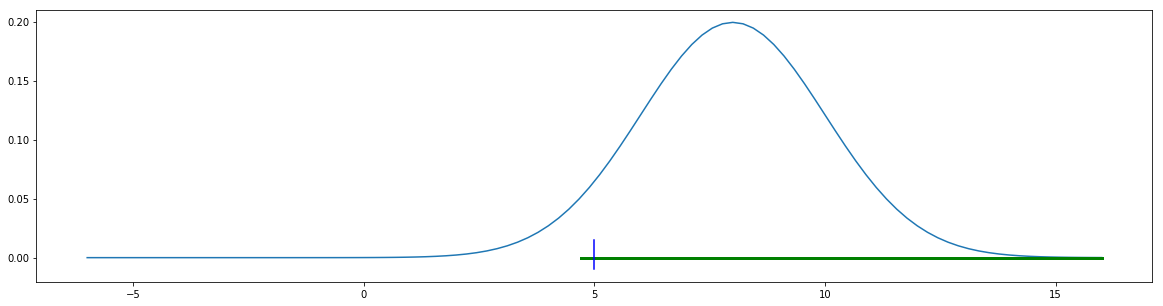

In [52]:
vi(8)